In [1]:
import pandas as pd
import numpy as np

file_name = './material/seoul-covid19_6_30_.csv'
df = pd.read_csv(file_name)
df.sort_values(by='연번', ascending=False)

,연번,환자,확진일,거주지,여행력,접촉력,조치사항
0,1321,12830,6.30.,영등포구,-,영등포구 확진자 접촉,-
1,1320,12829,6.30.,관악구,-,확인 중,보라매병원
2,1319,12831,6.30.,영등포구,-,확인 중,중앙대학교병원
3,1318,12808,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
4,1317,12809,6.30.,관악구,-,강남구 역삼동 모임,보라매병원
...,...,...,...,...,...,...,...
1316,5,9,1.31.,성북구,-,#5 접촉,서울의료원(퇴원)
1317,4,7,1.30.,마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
1318,3,6,1.30.,종로구,-,#3 접촉,서울대학교병원(퇴원)
1319,2,5,1.30.,중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)


<AxesSubplot:title={'center':'한글 제목'}>

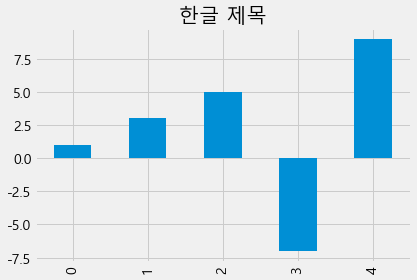

In [2]:
#한글폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# retina 디스플레이 지원환경에서 폰트 선명하게 하기
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

plt.style.use('fivethirtyeight')

pd.Series([1, 3, 5, -7, 9]).plot.bar(title='한글 제목')

In [3]:
# 확진일 6.30. --> 2020-06-30
df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace('.','-'))
df[['확진일자', '확진일']].head()

<ipython-input-3-e8e108ba8cc7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['확진일자'] = pd.to_datetime('2020-' + df['확진일'].str.replace('.','-'))


,확진일자,확진일
0,2020-06-30,6.30.
1,2020-06-30,6.30.
2,2020-06-30,6.30.
3,2020-06-30,6.30.
4,2020-06-30,6.30.


In [4]:
# 월 추출
df['월'] = df['확진일자'].dt.month
df[['확진일자', '확진일', '월']].head()

,확진일자,확진일,월
0,2020-06-30,6.30.,6
1,2020-06-30,6.30.,6
2,2020-06-30,6.30.,6
3,2020-06-30,6.30.,6
4,2020-06-30,6.30.,6


In [5]:
# 해당 연도의 몇번째 주
df['주'] = df['확진일자'].dt.week
df[['확진일자', '확진일', '월', '주']].head()

<ipython-input-5-3ef32a01d454>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['주'] = df['확진일자'].dt.week


,확진일자,확진일,월,주
0,2020-06-30,6.30.,6,27
1,2020-06-30,6.30.,6,27
2,2020-06-30,6.30.,6,27
3,2020-06-30,6.30.,6,27
4,2020-06-30,6.30.,6,27


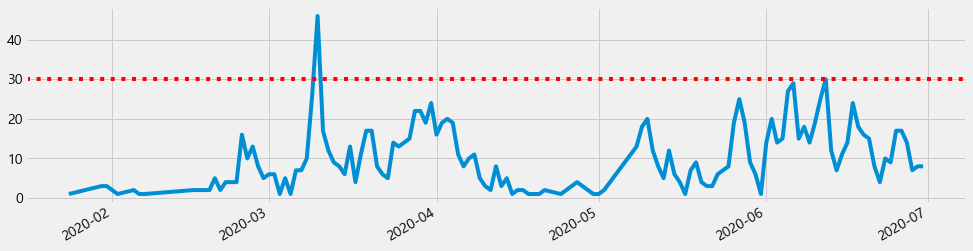

In [6]:
# 확진일자 선그래프
df['확진일자'].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color='red', linestyle=':')

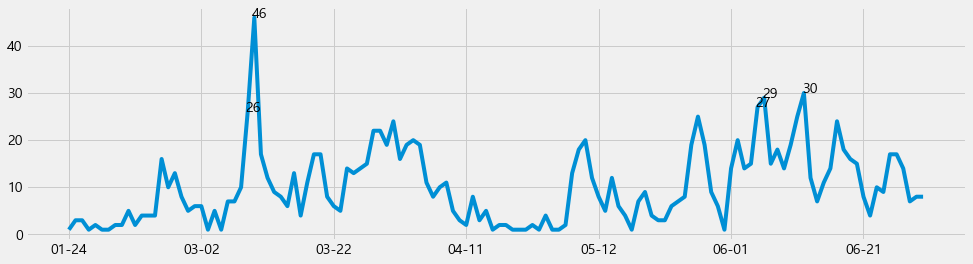

In [23]:
df['월일'] = df['확진일자'].astype(str).map(lambda x : x[-5:])
# index가 월-일 날짜이기 때문에 날짜 순으로 그리기 위해 sort_index()
day_count = df['월일'].value_counts().sort_index()
g = day_count.plot(figsize=(15,4))

for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    
    if case_count > 25:
        g.text(x=i-0.3, y=case_count, s=case_count)

In [25]:
day_count.describe()

count    130.000000
mean      10.161538
std        7.917015
min        1.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       46.000000
Name: 월일, dtype: float64

In [26]:
# 확진자가 가장 많은 날
day_count[day_count == day_count.max()]

03-10    46
Name: 월일, dtype: int64

In [28]:
df[df['월일'] == '03-10'].head()

,연번,환자,확진일,거주지,여행력,접촉력,조치사항,확진일자,월,주,월일
1119,202,7567,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1120,201,7711,3.10.,노원구,-,콜센터직원 접촉,서울의료원(퇴원),2020-03-10,3,11,03-10
1121,200,7555,3.10.,구로구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1122,199,7725,3.10.,양천구,-,구로구 콜센터 관련,서남병원(퇴원),2020-03-10,3,11,03-10
1123,198,7539,3.10.,양천구,-,콜센터직원 접촉,서남병원(퇴원),2020-03-10,3,11,03-10


<AxesSubplot:>

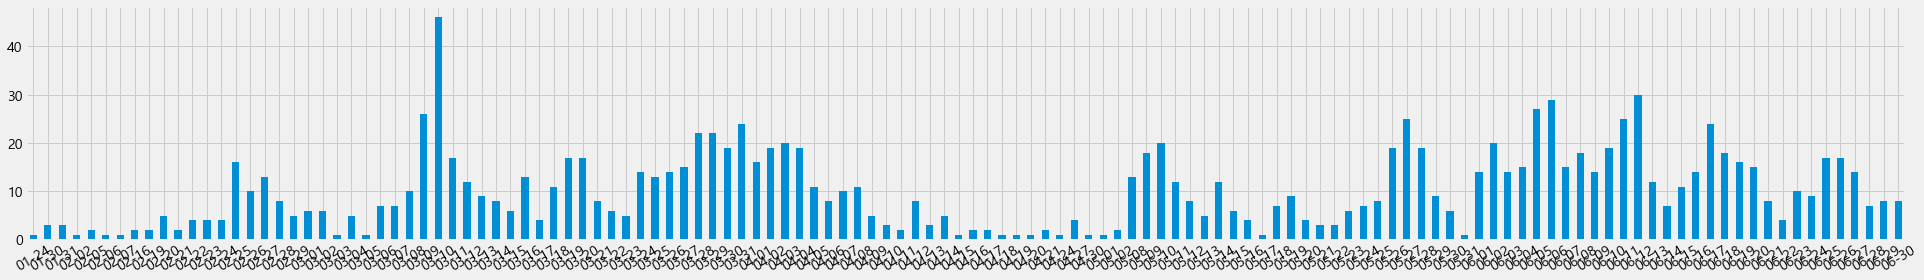

In [32]:
# 막대 그래프 그리기
day_count.plot.bar(figsize=(30,4), rot=30)


# 값이 잘 보이지 않음

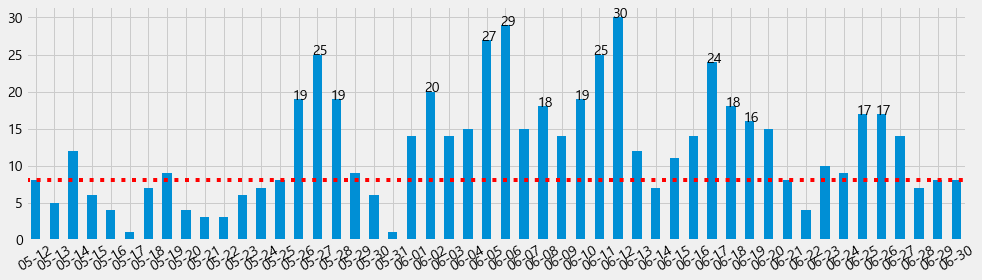

In [39]:
# 최근 데이터만 슬라이싱으로 나눠 그리기
g = day_count[-50:].plot.bar(figsize=(15, 4), rot=30)
g.axhline(day_count.median(), linestyle=':', color='red')

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    
    if case_count > 15:
        g.text(x=i-0.3, y=case_count, s=case_count)

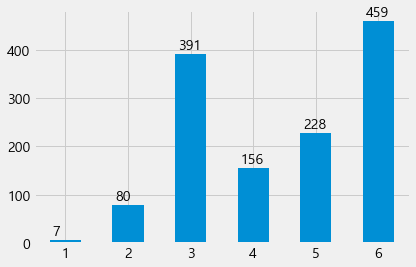

In [42]:
# 월 별 확진자 수 그리기
month_case = df['월'].value_counts().sort_index()
g = month_case.plot.bar(rot=0)

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

In [43]:
# -1 인덱스: 가장 마지막 인덱스 --> 최초 발생일, 7번째 컬럼 날짜
first_day = df.iloc[-1, 7]

# df.iloc[0]['확진일자'] 보다 아래와 같은 코드가 더 빠르다
last_day = df.iloc[0, 7]

In [45]:
days = pd.date_range(first_day, last_day)
days

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=159, freq='D')

In [48]:
# Series와 DataFrame을 합치기 위해서 DataFrame으로 변환
# 이런 방법도 있다 days.to_frame()
df_days = pd.DataFrame({'확진일자': days})
df_days.head()

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28


In [50]:
# 확진일자별 빈도수
daily_case = df['확진일자'].value_counts()
daily_case.head()

2020-03-10    46
2020-06-12    30
2020-06-06    29
2020-06-05    27
2020-03-09    26
Name: 확진일자, dtype: int64

In [53]:
#df_daily_case = daily_case.to_frame()
df_daily_case = daily_case
df_daily_case.head()

,확진일자
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26


In [54]:
df_daily_case.columns = ['확진수']
df_daily_case

,확진수
2020-03-10,46
2020-06-12,30
2020-06-06,29
2020-06-05,27
2020-03-09,26
...,...
2020-04-15,1
2020-02-07,1
2020-02-06,1
2020-05-17,1


In [58]:
# merge
all_day = df_days.merge(
              df_daily_case,
              left_on='확진일자',
              right_on=df_daily_case.index,
              how='left'
             )
all_day.head()

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN


In [61]:
# 결측치 치환 및 값 누적
all_day['누적확진'] = all_day['확진수'].fillna(0).cumsum()
all_day

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,NaN,1.0
2,2020-01-26,NaN,1.0
3,2020-01-27,NaN,1.0
4,2020-01-28,NaN,1.0
...,...,...,...
154,2020-06-26,17.0,1284.0
155,2020-06-27,14.0,1298.0
156,2020-06-28,7.0,1305.0
157,2020-06-29,8.0,1313.0


In [63]:
all_day['일자'] = all_day['확진일자'].astype(str).map(lambda x:x[-5:])
all_day.head()

,확진일자,확진수,누적확진,일자
0,2020-01-24,1.0,1.0,01-24
1,2020-01-25,NaN,1.0,01-25
2,2020-01-26,NaN,1.0,01-26
3,2020-01-27,NaN,1.0,01-27
4,2020-01-28,NaN,1.0,01-28


In [66]:
cum_day = all_day[['일자', '확진수', '누적확진']]
cum_day = cum_day.set_index('일자')
cum_day                    

,확진수,누적확진
일자,,
01-24,1.0,1.0
01-25,NaN,1.0
01-26,NaN,1.0
01-27,NaN,1.0
01-28,NaN,1.0
...,...,...
06-26,17.0,1284.0
06-27,14.0,1298.0
06-28,7.0,1305.0


<AxesSubplot:xlabel='일자'>

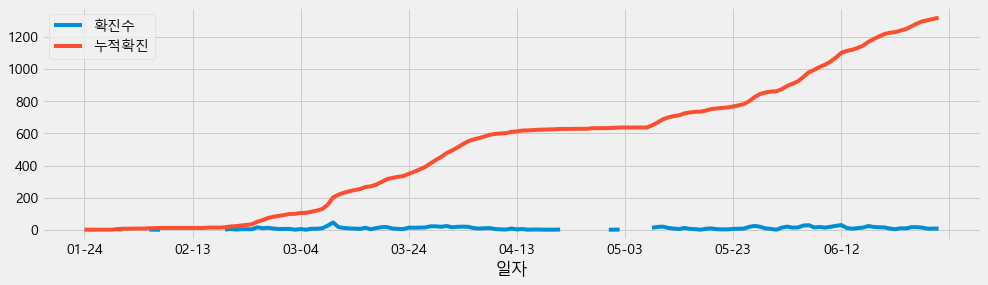

In [67]:
cum_day.plot(figsize=(15, 4))

<AxesSubplot:xlabel='일자'>

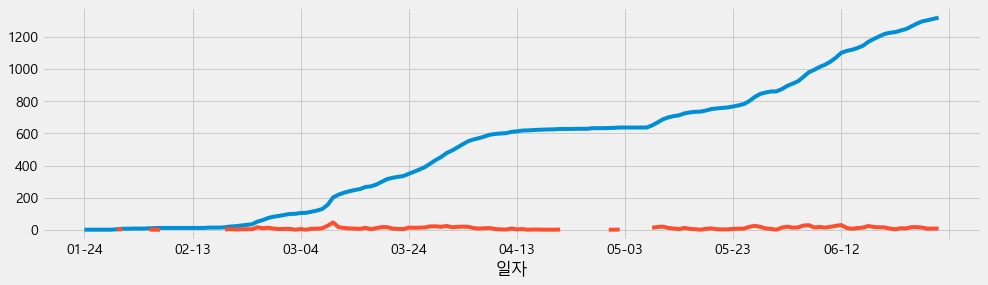

In [70]:
# 시리즈로 그리기
cum_day['누적확진'].plot(figsize=(15,4))
cum_day['확진수'].plot()

# 두 그래프의 차이가 커서 밑에 그래프는 잘 안보인다

<AxesSubplot:xlabel='일자'>

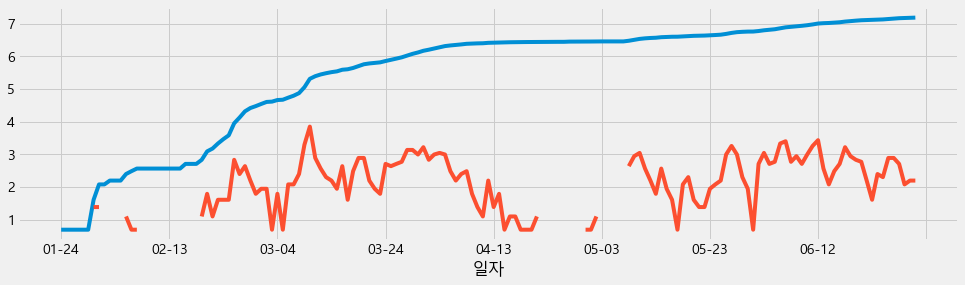

In [74]:
# 로그스케일
# log는 1이하에서 -무한에 수렴할 수 있어서 이를 방지하고자 +1
np.log(cum_day['누적확진'] + 1).plot(figsize=(15,4))
np.log(cum_day['확진수'] + 1).plot()